## Question


Referring the figure below, follow the guidelines.
1. X, Y, b1, b2 are vectors, w1 & w2 are matrices.
 - Sizes of X & Y are defined in the code, size of z1 is 5.
2. Cross-entropy loss is already implemented in the code.
3. Generate parameters(w1, b1, w2, b2) with torch.randn.
4. Print the gradients of parameters(w1, b1, w2, b2).

<img src = "https://drive.google.com/uc?id=1pyZiWipSU8v8NEoyfDDxIaRXOgNlFwon" height = 400>

In [7]:
import torch
import torch.nn.functional as F

x = torch.ones(7) # (7)
y = torch.zeros(3) # (3)

# Generate w1, b1, w2, b2
w1 = torch.randn(7,5, requires_grad = True)
b1 = torch.randn(5, requires_grad = True)
w2 = torch.randn(5,3, requires_grad = True)
b2 = torch.randn(3, requires_grad = True)

# Compute z1
### torch.matmul : 두 텐서의 행렬 곱
z1 = x @ w1 + b1

# Compute z2
### torch.nn.ReLU : 신경망 모델의 레이어로서 사용
### torch.nn.functional.relu : 함수형태로 사용하는 ReLU함수(순수한 연산)
z2 = F.relu(z1)

# Compute z3
z3 = z2 @ w2 + b2

# Calculate loss
loss = F.binary_cross_entropy_with_logits(z3, y)

# Backpropagation
loss.backward()

# (4) Print the gradient of w and b
print("The Gradient of w1:", w1.grad)
print("The Gradient of b1:", b1.grad)
print("The Gradient of w2:", w2.grad)
print("The Gradient of b2:", b2.grad)

The Gradient of w1: tensor([[-0.0234,  0.0000, -0.0267,  0.0260, -0.0210],
        [-0.0234,  0.0000, -0.0267,  0.0260, -0.0210],
        [-0.0234,  0.0000, -0.0267,  0.0260, -0.0210],
        [-0.0234,  0.0000, -0.0267,  0.0260, -0.0210],
        [-0.0234,  0.0000, -0.0267,  0.0260, -0.0210],
        [-0.0234,  0.0000, -0.0267,  0.0260, -0.0210],
        [-0.0234,  0.0000, -0.0267,  0.0260, -0.0210]])
The Gradient of b1: tensor([-0.0234,  0.0000, -0.0267,  0.0260, -0.0210])
The Gradient of w2: tensor([[0.0048, 0.0240, 0.0287],
        [0.0000, 0.0000, 0.0000],
        [0.0160, 0.0807, 0.0967],
        [0.0135, 0.0683, 0.0818],
        [0.0108, 0.0543, 0.0651]])
The Gradient of b2: tensor([0.0036, 0.0184, 0.0220])


## Question


Given the information below, build the model and train & evaluate it.
 Use torch.nn.functional.relu for activation layer.

- Input shape: (1, 28, 28)
- fc1: Apply a linear transformation using nn.Linear function. Size of the output features should be 128
- fc2: Apply a linear transformation using nn.Linear function. Size of the output features should be 64
- Classifier: Apply a linear transformation. Size of the output features should be class size (10)

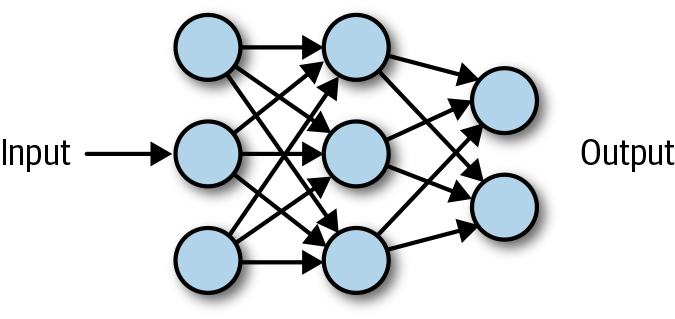

### Data Preparation

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Run the codes to check the result.

# Set dataset
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Set dataloader
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

100%|████████████████████████████| 9912422/9912422 [00:02<00:00, 4655196.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|████████████████████████████████| 28881/28881 [00:00<00:00, 5011405.50it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 2376938.86it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|███████████████████████████████████| 4542/4542 [00:00<00:00, 996210.26it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



example data shape:  torch.Size([64, 1, 28, 28])


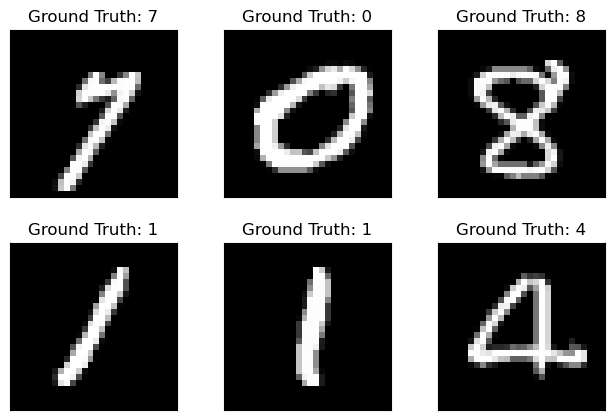

In [2]:
import matplotlib.pyplot as plt

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("example data shape: ", example_data.shape)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])

### Implement Simple Neural Network

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Simple_NN(nn.Module):
    '''
    Define the model using below information.
    We need to use ReLU between linear layers.
    - input shape: (1, 28, 28)
    - fc1: apply a linear transformation. output features should be 128
    - fc2: apply a linear transformation. output features should be 64
    - classifier: apply a linear transformation. output features should be the class size (10)

    * model : input -> fc1 -> relu -> fc2 -> relu -> classifier
    * You can use nn.Linear() for fc layer
     ex) fc = nn.Linear(input_dim, output_dim)
         y = fc(x)
    '''
    def __init__(self):
        super(Simple_NN, self).__init__()
        self.fc1_layer = nn.Linear(784,128)
        self.fc2_layer = nn.Linear(128,64)
        self.classifier = nn.Linear(64,10)
        self.relu = F.relu
    
    def forward(self, x):
        x = x.reshape(-1, 784) # Note: To apply fc layer, input should be flattened
        x = self.relu(self.fc1_layer(x))
        x = self.relu(self.fc2_layer(x))
        x = self.classifier(x)
        return x

model = Simple_NN()
print(model)

Simple_NN(
  (fc1_layer): Linear(in_features=784, out_features=128, bias=True)
  (fc2_layer): Linear(in_features=128, out_features=64, bias=True)
  (classifier): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
from tqdm import tqdm

def train(model, scheduler, optim, loss_fn, train_loader, epochs, device):
    for epoch in range(epochs):
        train_loss = 0.0

        # (1) Set the mode
        model.train()

        for batch in tqdm(train_loader):
            # (2) Initialize Gradients
            optim.zero_grad()
        
            input, target = batch
            
            # (3) Change the device of the input and target to device where model exists
            input = input.to(device) 
            target = target.to(device)

            # (4) Get output
            output = model(input)

            # (5) Get loss using loss_fn
            loss = loss_fn(output, target)

            # (6) Do Backpropagation
            loss.backward()

            # (7) Update the optimizer (hint: use the argument optim and its method step)
            optim.step()
            
            train_loss += loss.detach().item()
        
        # (8) Update the scheduler
        scheduler.step()
        
        train_loss /= len(train_loader.dataset)

        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device is {device}\n")

num_epochs = 3

import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

model.to(device)

train(model, scheduler, optimizer, nn.CrossEntropyLoss(), train_loader, num_epochs, device)

device is cpu



100%|████████████████████████████████████████| 938/938 [00:01<00:00, 586.52it/s]


Epoch: 1, Training Loss: 0.00827450502042969


100%|████████████████████████████████████████| 938/938 [00:01<00:00, 643.66it/s]


Epoch: 2, Training Loss: 0.002957462049710254


100%|████████████████████████████████████████| 938/938 [00:01<00:00, 657.26it/s]

Epoch: 3, Training Loss: 0.002057840357441455


In [10]:
def test(model, loss_fn, device):
    # Set the mode
    model.eval()
    
    correct = 0
    
    with torch.no_grad():
        for batch in tqdm(test_loader):
            input, target = batch
            # Change the device of input & target
            input = input.to(device)
            target = target.to(device)
            
            # Get output using the model
            output = model(input)

            # Get accuracy using the output and target
            pred = output.argmax(dim=1)
          
            correct += pred.eq(target.data.view_as(pred)).sum()
            
    print(f'\nAccuracy: {round(float(100. * correct / len(test_loader.dataset)), 2)}%')

In [11]:
test(model, nn.CrossEntropyLoss(), device)

100%|████████████████████████████████████████| 157/157 [00:00<00:00, 650.41it/s]


Accuracy: 96.54%
